# SAGAN: Self-Attention Generative Adversarial Networks
[Paper](https://arxiv.org/abs/1805.08318v1?ref=floydhub-blog): Self-Attention Generative Adversarial Networks (2018)

[Code](https://github.com/heykeetae/Self-Attention-GAN?ref=floydhub-blog)

In this paper, they propose **Self-Attention Generative Adversarial Networks (SAGANs)**, which introduce a **self-attention mechanism into convolutional GANs**. The self-attention module is complementary to convolutions and helps with modeling long range, multi-level dependencies across image regions. Armed with self-attention, the generator can draw images in which fine details at every location are carefully coordinated with fine details in distant portions of the image. Moreover, the discriminator can also more accurately enforce complicated geometric constraints on the global image structure.

**Attention Models.** Recently, attention mechanisms have become an integral part of models that
must capture *global dependencies*. In particular, self-attention, also called
intra-attention, calculates the response at a position in a sequence by attending to all positions within
the same sequence.

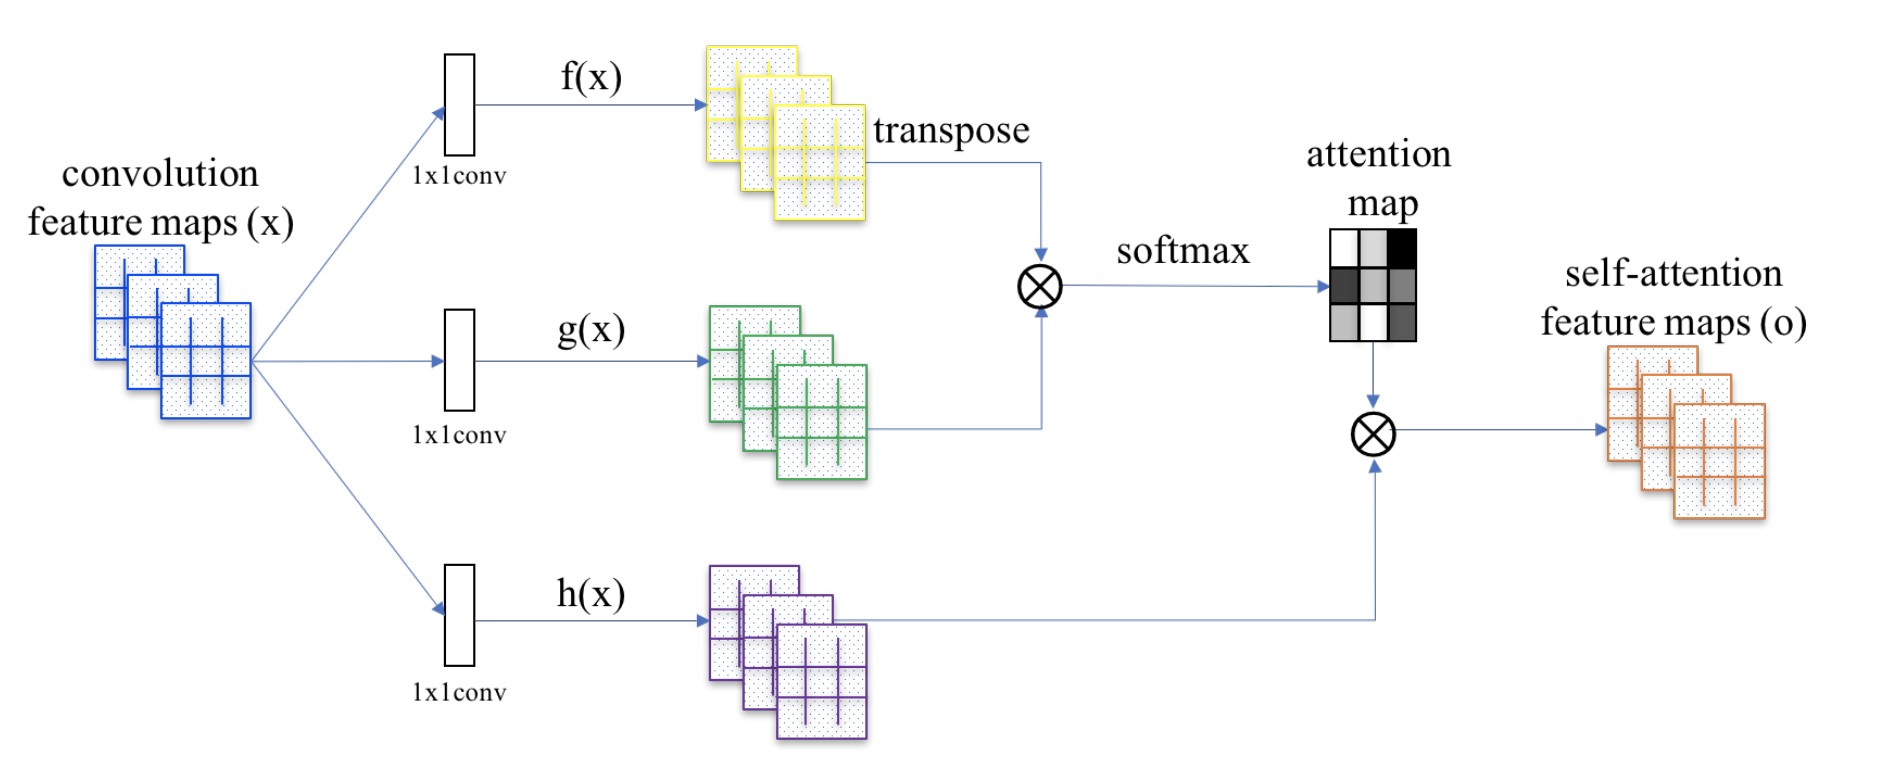

Most GAN-based models for image generation are built using convolutional layers. Convolution processes the information in a *local neighborhood*, thus using convolutional layers alone is computationally inefficient for modeling long-range dependencies in images. 

**Self-attention** exhibits a better balance between ability to model **long-range dependencies** and **computational and statistical efficiency**. The self-attention module calculates response at a position as a weighted sum of the features at all positions, where the weights – or attention vectors – are calculated with only a small computational cost.

The image features from the previous hidden layer $x \in R^{C \times N}$ are first transformed into two feature
spaces $f$, $g$ to calculate the attention, where $f(x) = W_fx$, $g(x) = W_gx$

$$βj,i = \frac{exp(s_{ij})}{\sum_{i=1}^N exp(s_{ij})},$$

where $s_{ij} = f(x_i)^T g(x_j),$

and $\beta_{j,i}$ indicates the extent to which the model attends to the $i^{th}$ location when synthesizing the $j^{th}$ region. Then the output of the attention layer is $o = (o_1, o_2, ..., o_j , ..., o_N ) \in R^{C \times N}$
, where, 

$$o_j = \sum_{i=1}^N \beta_{j,i} h(x_i)$$

where $ h(x_i) = W_h x_i$.

In the above formulation, $W_g \in R^{C¯\times C}$ , $W_f \in R^{C¯\times C}$, $W_h \in R^{C \times C}$ are the learned weight matrices, which are implemented as $1\times 1$ convolutions. We use $C¯ = \frac{C}{8}$ in all our experiments.
In addition, we further multiply the output of the attention layer by a scale parameter and add back the input feature map. Therefore, the final output is given by,

$$ y_i = \gamma o_i + x_i, $$

where $\gamma$ is initialized as 0. This allows the network to first rely on the cues in the local neighborhood – since this is easier – and then gradually learn to assign more weight to the non-local evidence. The intuition for why we do this is straightforward: we want to learn the easy task first and then progressively increase the complexity of the task. In SAGAN, the proposed attention module has been applied to both generator and discriminator, which are trained in an alternating fashion by minimizing the hinge version of the adversarial loss.

$ LD = −E_{(x,y)\sim p_{data}} [min(0, −1 + D(x, y))] − E_{z\sim p_z,y\sim p_{data}} [min(0, −1 − D(G(z), y))], $

$ LG = −E_{z∼p_z,y\sim p_{data}} D(G(z), y),$

In [1]:
#! python3 /Users/mgalfre/Cgnal/PyTorch-GAN/implementations/dcgan/dcgan.py --n_epochs 70

### Usage
1. Clone the [repository](https://github.com/heykeetae/Self-Attention-GAN?ref=floydhub-blog)
    * `git clone https://github.com/heykeetae/Self-Attention-GAN.git`
    * `cd Self-Attention-GAN`

2. Install datasets (CelebA or LSUN)
    * `bash download.sh CelebA` or
    * `bash download.sh LSUN`
3. Train
    * `python python main.py --batch_size 64 --imsize 64 --dataset celeb --adv_loss hinge --version sagan_celeb` or
    * `python python main.py --batch_size 64 --imsize 64 --dataset lsun --adv_loss hinge --version sagan_lsun`
4. Enjoy the results
    * `cd samples/sagan_celeb` or
    * `cd samples/sagan_lsun`
    
Samples generated every 100 iterations are located. The rate of sampling could be controlled via --sample_step (ex, --sample_step 100).